In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# 'keys': ['mem_size', 'serde_size', 'time_ser', 'time_de'],
# from test_rept_vs_ndept
data = {
    100000: {
        'rept_metrics': np.array([62.56337738, 47.77950287, 12.72998091, 13.6062874 ]), 'ndept_metrics': np.array([3.43473053e+00, 1.06048584e-03, 3.44864900e-03, 2.52287300e-03])
    },
    1000000: {
        'rept_metrics': np.array([626.03969574, 477.79167938, 133.38771497, 135.06922879]), 'ndept_metrics': np.array([3.43337784e+01, 3.46374512e-03, 2.25810510e-02, 2.49783950e-02])
    }, 
}

In [8]:
data

{100000: {'rept_metrics': array([62.56337738, 47.77950287, 12.72998091, 13.6062874 ]),
  'ndept_metrics': array([3.43473053e+00, 1.06048584e-03, 3.44864900e-03, 2.52287300e-03])},
 1000000: {'rept_metrics': array([626.03969574, 477.79167938, 133.38771497, 135.06922879]),
  'ndept_metrics': array([3.43337784e+01, 3.46374512e-03, 2.25810510e-02, 2.49783950e-02])}}

In [23]:
memory_size = [[], []]
disk_size = [[], []]
serialization = [[], []]
deserialization = [[], []]
for size in sorted(data.keys()):
    rept_metrics = data[size]["rept_metrics"]
    memory_size[0].append(rept_metrics[0])
    disk_size[0].append(rept_metrics[1])
    serialization[0].append(rept_metrics[2])
    deserialization[0].append(rept_metrics[3])
    ndept_metrics = data[size]["ndept_metrics"]
    memory_size[1].append(ndept_metrics[0])
    disk_size[1].append(ndept_metrics[1])
    serialization[1].append(ndept_metrics[2])
    deserialization[1].append(ndept_metrics[3])

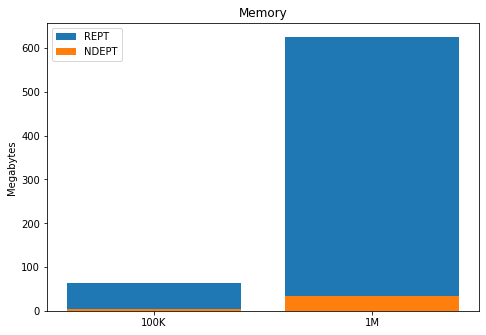

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sizes = ['100K', '1M']
ax.bar(sizes, memory_size[0])
ax.bar(sizes, memory_size[1])
ax.legend(labels=['REPT', 'NDEPT'])
ax.set_title('Memory')
ax.set_ylabel('Megabytes')
plt.show()

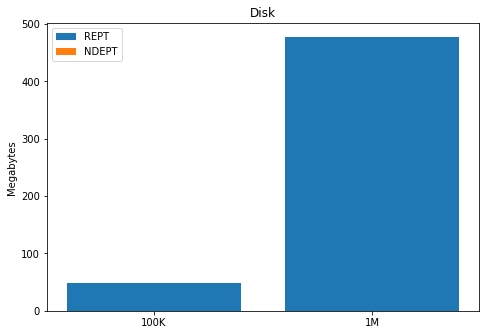

In [31]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sizes = ['100K', '1M']
ax.bar(sizes, disk_size[0])
ax.bar(sizes, disk_size[1])
ax.legend(labels=['REPT', 'NDEPT'])
ax.set_title('Disk')
ax.set_ylabel('Megabytes')
plt.show()

99.98307111640298

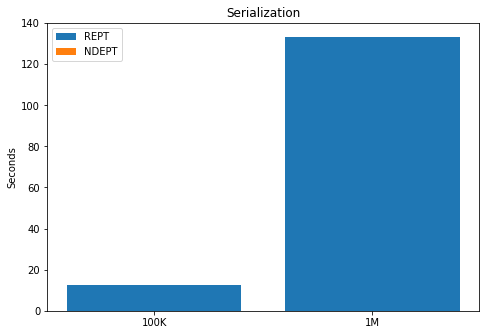

In [33]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sizes = ['100K', '1M']
ax.bar(sizes, serialization[0])
ax.bar(sizes, serialization[1])
ax.legend(labels=['REPT', 'NDEPT'])
ax.set_title('Serialization')
ax.set_ylabel('Seconds')
plt.show()

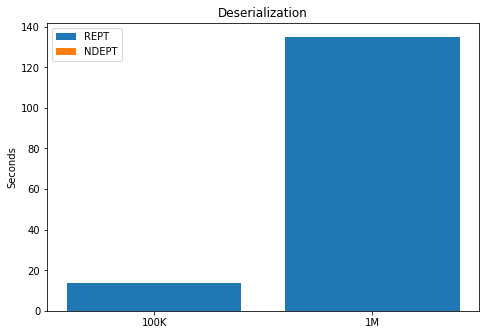

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sizes = ['100K', '1M']
ax.bar(sizes, deserialization[0])
ax.bar(sizes, deserialization[1])
ax.legend(labels=['REPT', 'NDEPT'])
ax.set_title('Deserialization')
ax.set_ylabel('Seconds')
plt.show()

In [46]:
mem = (memory_size[0][1] - memory_size[1][1]) / memory_size[0][1] * 100
disk = (disk_size[0][1] - disk_size[1][1]) / disk_size[0][1] * 100
ser = (serialization[0][1] - serialization[1][1]) / serialization[0][1] * 100
de = (deserialization[0][1] - deserialization[1][1]) / deserialization[0][1] * 100

In [47]:
data = [mem, disk, ser, de]

In [51]:
data

[94.51571863036315, 99.99927505118455, 99.98307111640298, 99.98150696851994]

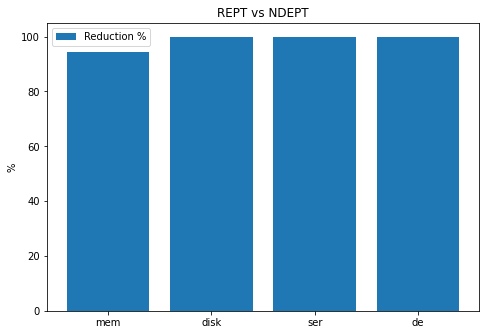

In [57]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sizes = ['mem', 'disk', "ser", "de"]
ax.bar(sizes, data)
ax.legend(labels=['Reduction %'])
ax.set_title('REPT vs NDEPT')
ax.set_ylabel('%')
plt.show()